In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv('housepricedataset.csv')


In [3]:
df.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
df=df.dropna()
Address_nan_count = df['Address'].isna().sum()
price_nan_count = df['Price'].isna().sum()
print(Address_nan_count)

0


In [6]:
df.replace({False: 0, True: 1}, inplace=True)
df.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,1,1,0,North Program Organization,2.050000e+09,68333.33
6,87,2,1,1,1,Pardis,6.000000e+08,20000.00
7,59,1,1,1,1,Shahran,2.150000e+09,71666.67
8,54,2,1,1,0,Andisheh,4.930000e+08,16433.33
9,71,1,1,1,1,West Ferdows Boulevard,2.370000e+09,79000.00


In [7]:
df.Area = pd.to_numeric(df.Area, errors='coerce')
# delet outliers in Area
#convert str to int 

In [9]:
df=df.dropna()
df['Area'].isna().sum()


0

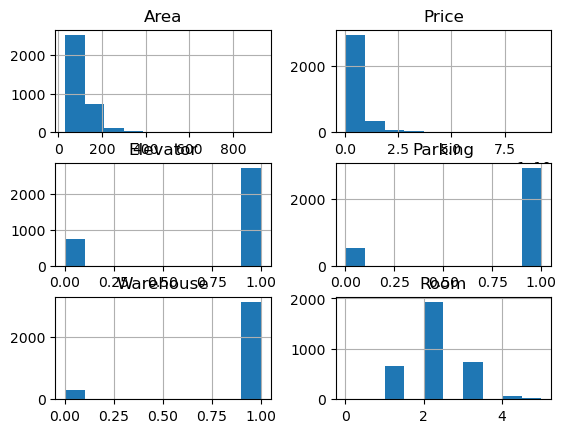

In [10]:
viz=df[['Area','Price','Address','Elevator','Parking','Warehouse','Room']]
viz.hist()
plt.show()


In [11]:
print(df["Address"].unique())

['Shahran' 'Pardis' 'Shahrake Qods' 'Shahrake Gharb'
 'North Program Organization' 'Andisheh' 'West Ferdows Boulevard' 'Narmak'
 'Saadat Abad' 'Zafar' 'Islamshahr' 'Pirouzi' 'Shahrake Shahid Bagheri'
 'Moniriyeh' 'Velenjak' 'Amirieh' 'Southern Janatabad' 'Salsabil'
 'Zargandeh' 'Feiz Garden' 'Water Organization' 'ShahrAra' 'Gisha' 'Ray'
 'Abbasabad' 'Ostad Moein' 'Farmanieh' 'Parand' 'Punak' 'Qasr-od-Dasht'
 'Aqdasieh' 'Pakdasht' 'Railway' 'Central Janatabad'
 'East Ferdows Boulevard' 'Pakdasht KhatunAbad' 'Sattarkhan' 'Baghestan'
 'Shahryar' 'Northern Janatabad' 'Daryan No'
 'Southern Program Organization' 'Rudhen' 'West Pars' 'Afsarieh'
 'Marzdaran' 'Dorous' 'Sadeghieh' 'Chahardangeh' 'Baqershahr' 'Jeyhoon'
 'Lavizan' 'Shams Abad' 'Fatemi' 'Keshavarz Boulevard' 'Kahrizak'
 'Qarchak' 'Northren Jamalzadeh' 'Azarbaijan' 'Bahar'
 'Persian Gulf Martyrs Lake' 'Beryanak' 'Heshmatieh' 'Elm-o-Sanat'
 'Golestan' 'Shahr-e-Ziba' 'Pasdaran' 'Chardivari' 'Gheitarieh'
 'Kamranieh' 'Gholhak' 'Heravi

In [12]:
uniqueValues = df['Address'].nunique()
print(uniqueValues)

192


In [13]:
uniqueValues = df.nunique()
print(uniqueValues)

Area          237
Room            6
Parking         2
Warehouse       2
Elevator        2
Address       192
Price         927
Price(USD)    925
dtype: int64


In [14]:
# importing the libraries 
from sklearn.preprocessing import LabelBinarizer 
  
# creating a copy of the 
# original data frame 
df1 = df.copy() 
  
# creating an object  
# of the LabelBinarizer 
label_binarizer = LabelBinarizer() 
  
# fitting the column  
# TEMPERATURE to LabelBinarizer 
label_binarizer_output = label_binarizer.fit_transform(df1['Address']) 
  
# creating a data frame from the object 
resultAddress_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 
  
display(resultAddress_df) 

,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.drop(columns=['Address'])
frames = [df, resultAddress_df]

result = pd.concat(frames)
result.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Abazar,Abbasabad,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63.0,1.0,1.0,1.0,1.0,Shahran,1.850000e+09,61666.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60.0,1.0,1.0,1.0,1.0,Shahran,1.850000e+09,61666.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79.0,2.0,1.0,1.0,1.0,Pardis,5.500000e+08,18333.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95.0,2.0,1.0,1.0,1.0,Shahrake Qods,9.025000e+08,30083.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,123.0,2.0,1.0,1.0,1.0,Shahrake Gharb,7.000000e+09,233333.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,70.0,2.0,1.0,1.0,0.0,North Program Organization,2.050000e+09,68333.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,87.0,2.0,1.0,1.0,1.0,Pardis,6.000000e+08,20000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,59.0,1.0,1.0,1.0,1.0,Shahran,2.150000e+09,71666.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,54.0,2.0,1.0,1.0,0.0,Andisheh,4.930000e+08,16433.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,71.0,1.0,1.0,1.0,1.0,West Ferdows Boulevard,2.370000e+09,79000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
result=result.fillna(0)
result.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Abazar,Abbasabad,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63.0,1.0,1.0,1.0,1.0,Shahran,1.850000e+09,61666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,1.0,1.0,1.0,1.0,Shahran,1.850000e+09,61666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79.0,2.0,1.0,1.0,1.0,Pardis,5.500000e+08,18333.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,2.0,1.0,1.0,1.0,Shahrake Qods,9.025000e+08,30083.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123.0,2.0,1.0,1.0,1.0,Shahrake Gharb,7.000000e+09,233333.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,70.0,2.0,1.0,1.0,0.0,North Program Organization,2.050000e+09,68333.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,87.0,2.0,1.0,1.0,1.0,Pardis,6.000000e+08,20000.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,59.0,1.0,1.0,1.0,1.0,Shahran,2.150000e+09,71666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,54.0,2.0,1.0,1.0,0.0,Andisheh,4.930000e+08,16433.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,71.0,1.0,1.0,1.0,1.0,West Ferdows Boulevard,2.370000e+09,79000.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Price'>

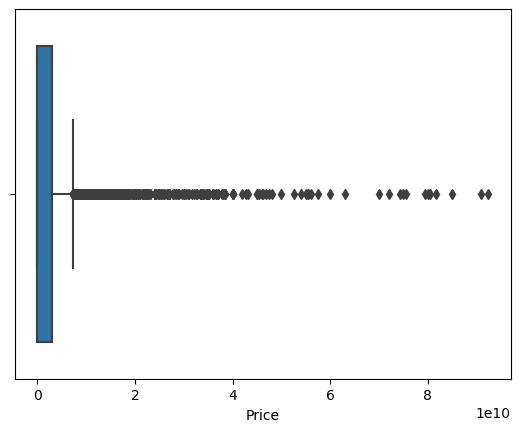

In [17]:
sns.boxplot(x=result['Price'])


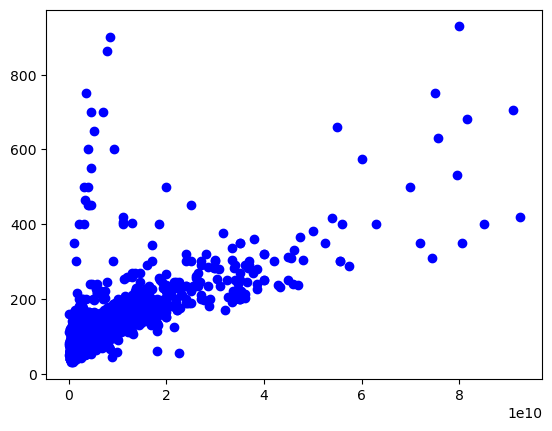

In [18]:
plt.scatter(df.Price, df.Area, color='blue')

plt.show()

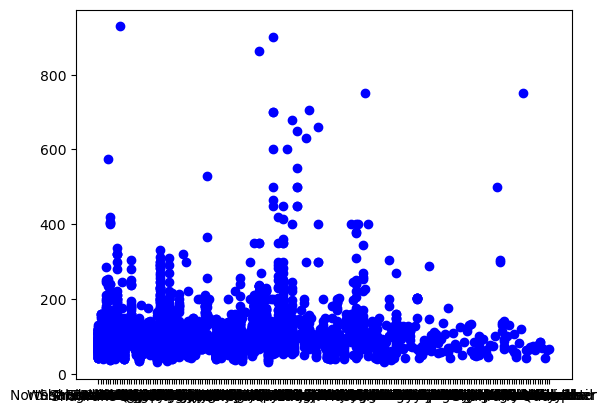

In [19]:
plt.scatter(df.Address, df.Area, color='blue')

plt.show()

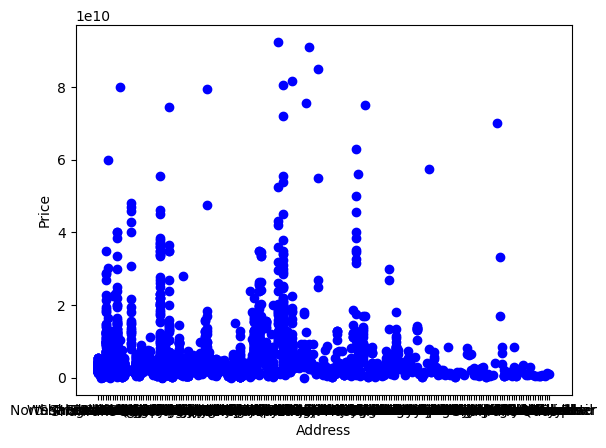

In [20]:
plt.scatter(df.Address, df.Price,  color='blue')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

In [21]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

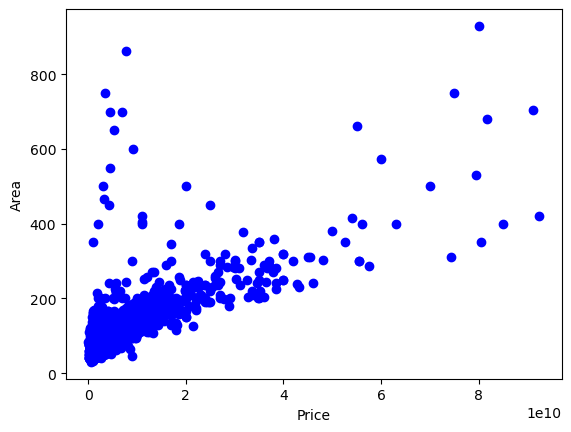

In [22]:
plt.scatter(train.Price, train.Area,  color='blue')
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Price']])
train_y = np.asanyarray(train[['Area']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[6.28663195e-09]]
Intercept:  [72.73270207]


Text(0, 0.5, 'Area')

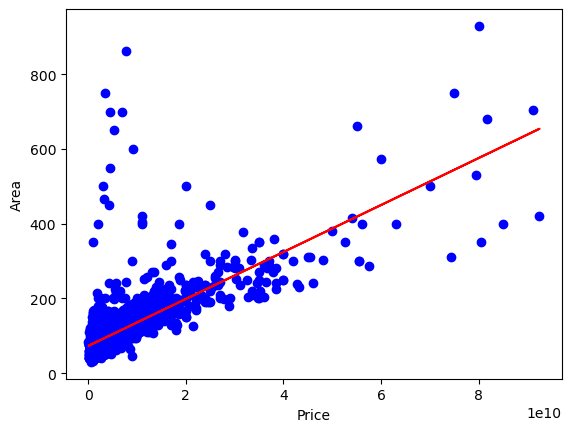

In [24]:
plt.scatter(train.Price, train.Area,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Price")
plt.ylabel("Area")

In [25]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
#اول مثبت بود بعد منفی شش صدم شد و بعد شد منفی چهل و هشت صدم(R2)دوبار تغییر کرده است مقدار

Mean absolute error: 5074538586.33
Residual sum of squares (MSE): 79087252262650445824.00
R2-score: -0.48
